In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Iris

In [2]:
data = datasets.load_iris()
X = data.data[:, :2]  
y = data.target
X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
Model = xgb.XGBClassifier(n_samples=1000,shuffle=True,random_state=1)
Model.fit(X_Train, y_Train)

[20:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_samples", "shuffle" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, n_samples=1000, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=1, ...)

In [4]:
Model.score(X_Test, y_Test)

0.72

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

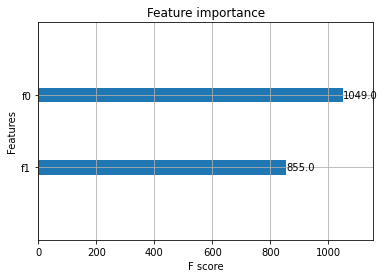

In [5]:
xgb.plot_importance(Model)

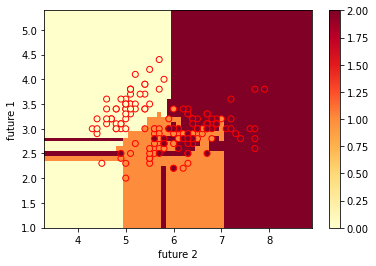

In [6]:
h=0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=plt.cm.YlOrRd)
plt.ylabel('future 1')
plt.xlabel('future 2')

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.YlOrRd,edgecolors="r")
plt.ylabel('future 1')
plt.xlabel('future 2')
plt.colorbar()

## mnist

In [7]:
data = datasets.load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target

X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
Model = xgb.XGBClassifier(n_samples=1000,shuffle=True,random_state=1)
Model.fit(X_Train, y_Train)

[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_samples", "shuffle" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, n_samples=1000, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=1, ...)

In [9]:
Model.score(X_Test, y_Test)

0.968013468013468

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

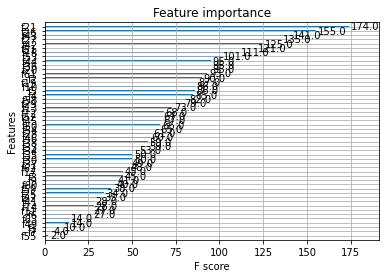

In [10]:
xgb.plot_importance(Model)